<a href="https://colab.research.google.com/github/StacyChebet/Android-Devices/blob/main/AndroidDevices_EDA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis using "Android Devices and Mobiles" dataset on Kaggle.

##**Dataset Overview**
The Android Devices and Mobiles dataset was scraped from Flipkart using Scrapy as part of a web scraping project. It was the creator’s second published dataset, primarily aimed at improving web scraping skills. This dataset provides an opportunity to practice exploratory data analysis (EDA), enhance data visualization skills, and work on solving basic regression problems. It serves as a valuable resource for honing analytical and modeling techniques in the context of e-commerce data.

##**Features in the Dataset**
- `battery`: The battery type and capacity in milliampere-hour (mAh)
- `camera`: The camera resolution in megapixels
- `display`: The screen size (in cm and inches) and the resolution
- `memory`: The RAM capacity in gigabytes
- `name`: The name of the device
- `price`: The price of the device
- `processor`: The processor type
- `rating`: The rating of the device on a scale of 0 - 5
- `reviews`: The number of reviews
- `warranty`: The rype of warranty

##**Loading Libraries and Data**
Libraries used:
- **Pandas**: For data manipulation
- **Numpy**: For numerical operations
- **Seaborn**: For data visualization


In [18]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Setting visualization styles
sns.set(style="whitegrid")

#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

#Changing directory
%cd /content/drive/My Drive/Colab Notebooks/Data Analytics - IBT/AndroidDevices

#Loading the dataset
file_path = "mobiles1.csv"
df = pd.read_csv(file_path)

#Displaying the first few rows of the dataset
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Data Analytics - IBT/AndroidDevices


,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


##**Initial Data Exploration**
An initial exploration of the dataset to understand its structure and basic characteristics by:
1. Checking the shape of the dataset
2. Displaying the data types of each column
3. Getting a summary of the dataset using descriptive statistics

In [19]:
#Checking the shape of the dataset
print(f"The data set contains {df.shape[0]} rows and {df.shape[1]} columns.")

#Displaying the data types of each column
print("\nData types of each column:")
print(df.dtypes)

#Getting a summary of the dataset using descriptive statistics
print("\nSummary of the dataset:")
print(df.describe().T)

The data set contains 984 rows and 10 columns.

Data types of each column:
battery       object
camera        object
display       object
memory        object
name          object
price          int64
processor     object
rating       float64
reviews       object
warranty      object
dtype: object

Summary of the dataset:
        count          mean           std    min     25%      50%       75%  \
price   984.0  15429.848577  12891.355967  887.0  7499.0  11649.0  17999.25   
rating  971.0      4.241195      0.300296    2.7     4.1      4.3      4.40   

             max  
price   104999.0  
rating       4.9  


##**Findings**
- The dataset only has 2 numeric columns: `price` and `rating`.
- The `rating` column has a count of 971 meaning 13 rows have null values.

##**Summary Statistics of the Numeric Columns**
- `price`: The price ranges from 887 to 104,999 with a significant standard deviation of 12891.36, suggesting a wide disparity in the device prices.
- `rating`: The rating ranges from 2.7 to 4.9 with a standard deviation of 0.3, suggesting that the data points are closer to the mean, which is 4.2.

##**Checking for Missing Values**

In [20]:
#Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
battery        0
camera         0
display        0
memory         0
name           0
price          0
processor      1
rating        13
reviews       13
warranty     148
dtype: int64


##**Missing Values Analysis**
Missing data can significantly affect the outcomes of our analysis and predictive modeling.<br>
Here's a breakdown of missing values across different columns in the dataset:
- `battery`, `camera`, `display`, `memory`, `name`, `price`: No missing values, which simplifies preprocessing for these columns.
- `processor`: 1 missing value. There is need to make a decision whether to remove or impute this value.
- `rating`: 13 missing values, which is small compared to the relative dataset size, and we may opt for simple imputation methods like mode replacement.
- `reviews`: 13 missing values and just like with `rating`, we might opt for mode replacement.
- `warranty`: 148 missing values, which is a significant number that requires careful consideration for imputation, as it could impact analysis related to the price of devices.

##**Check for Unique Values to Understand Cardinality**

In [21]:
#Check the number of unique values in each column to understand cardinality
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
battery      177
camera       185
display      125
memory        89
name         878
price        355
processor    287
rating        23
reviews      386
warranty      92
dtype: int64


##**Cardinality Analysis**
Understanding cardinality is important for identifying features with a wide range of values and those with limited variety, which influences how we might process and use these features in machine learning models.<br>
Below is a summary of the cardinality in each column of our dataset:
- `battery`: 177 unique values, which implys a wide range of battery capacities.
- `camera`: 185 unique values, which exhibits high cardinality, implying a wide range of camera resolutions.
- `display`: 125 unique values, which indicates moderate cardinality. This suggests that there is a significant variety in display specifications.
- `memory`: 89 unique values, which exhibits moderate cardinality meaning there may be commonly repeated values for example 32GB, 128GB.
- `name`: 878 unique values, indicating a high cardinality which suggests that most devices have unique names.
- `price`: 355 unique values, showing a relatively high variation in pricing.
- `processor`: 287 unique values which exhibits a relatively high cardinality, implying a wide range of processor specifications.
- `rating`: 23 unique values, indicating that there may be discrete ratings.
- `reviews`: 386 unique values, showing diverse review counts across devices.
- `warranty`: 92 unique values, exhibiting moderate cardinality. This means that there may be commonly repeated warranty specifications.

##**Implications of Cardinality**
- **High Cardinality (`name`, `processor`, `price`, `reviews`)**: May require encoding techniques like target encoding or embeddings if used in machine learning models.
- **Moderate Cardinality(`camera`, `battery`, `display`)**: May be grouped into bins for better analysis or visualization.
- **Low Cardinality (`memory`, `rating`, `warranty`)**: Suggests that these columns may be categorical and suitable for one-hot encoding


##**Treating Missing Values in the Dataset**
Missing values can introduce bias and affect the performance of machine learning models. <br>
The following columns have missing values that need to be addressed before further analysis:
- `processor`: Since this column is only missing 1 value, which is small relative to the size of the dataset, the most appropriate action is to drop this row.
- `rating`: 13 values are missing and since this is a categorical value, mode imputation is the best action, which represents the most common category.
- `reviews`: This column is also missing 13 values and mode imputation is the best course of action.
- `warranty`: There are 148 values missing in this column, which is significant when compared to the size of the dataset. Since there is no way to determine the warranty type, filling the missing values with 'No warranty information' would be the best course of action.

In [22]:
# Deleting the row with a missing processor value
df.dropna(subset=['processor'], inplace=True)

#Imputing the missing values in rating with mode
rating_mode = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(rating_mode)

#Imputing the missing values in reviews with mode
reviews_mode = df['reviews'].mode()[0]
df['reviews'] = df['reviews'].fillna(reviews_mode)

#Filling missing values in warranty with 'No warranty information available'
df.fillna({'warranty': "No Warranty Info"}, inplace=True)

In [23]:
print(df.isnull().sum())

battery      0
camera       0
display      0
memory       0
name         0
price        0
processor    0
rating       0
reviews      0
warranty     0
dtype: int64


###**Identifying Numerical and Categorical Variables**


In [24]:
# Remove the word "Reviews" and convert to numerical values
df["reviews"] = df["reviews"].str.replace(" Reviews", "", regex=False).str.replace(",", "").astype(int)

print(df.dtypes)

battery       object
camera        object
display       object
memory        object
name          object
price          int64
processor     object
rating       float64
reviews        int64
warranty      object
dtype: object


In [26]:
#Identifying numerical and categorical variables
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)

Numerical Variables: ['price', 'rating', 'reviews']
Categorical Variables: ['battery', 'camera', 'display', 'memory', 'name', 'processor', 'warranty']


##**Univariate Analysis**
1. **For Numerical Variables** <br>
We will use a histogram for each variables since it helps in understanding the frequency distribution, identifying skewness, and detecting outliers.

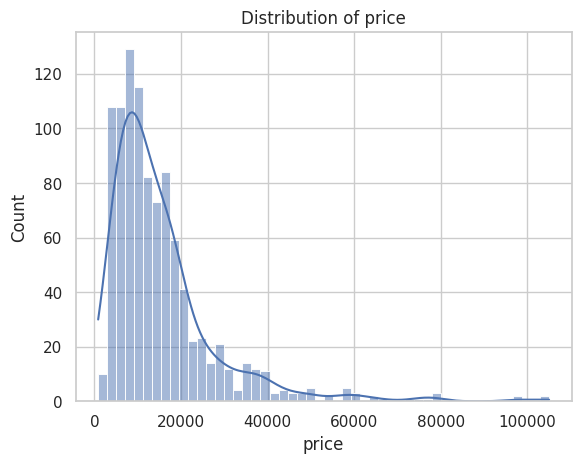

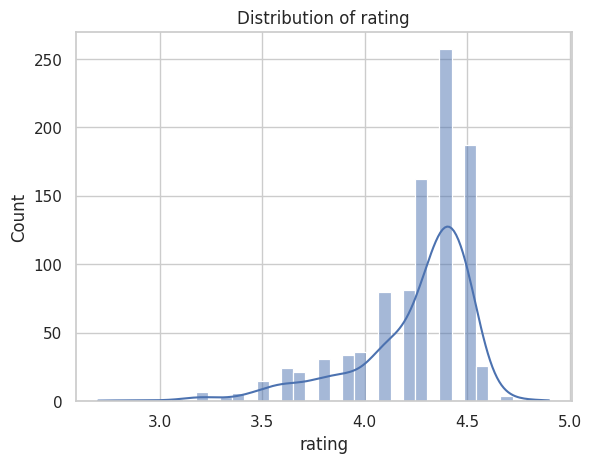

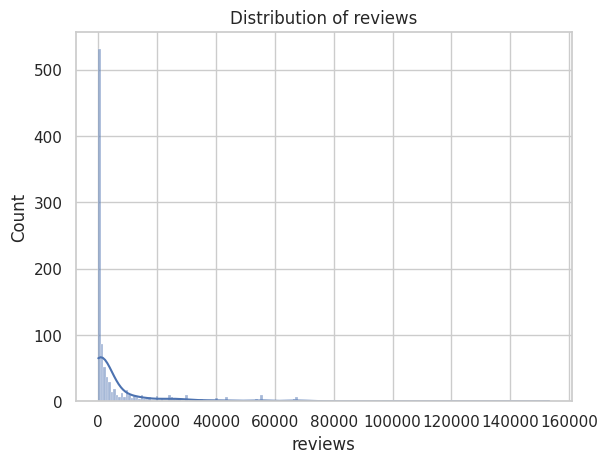

In [27]:
#Univariate analysis for numerical variables using histograms
for var in numerical_vars:
  sns.histplot(df[var].dropna(), kde=True)
  plt.title(f'Distribution of {var}')
  plt.show()

###**Histogram Findings**
1. `price`
- Right-skewed distribution, with most prices concentrated at the lower end.
- Some outliers with very high prices.
2. `rating`
- Left-skewed distribution, suggesting that most devices have a good rating.
3. `reviews`
- Highly right-skewed distribution, with most review counts concentrated on the lower end.